# Data Analysis Project : TMDb movie data
### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<blockquote>
    <h3> Overview</h3>
For this data analysis project, I used the TMDb movie dataset.

This dataset contains information about 10,000 movies including user ratings and revenue, this dataset was collected from The Movie Database (TMDb). It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.
</blockquote>


# Table of Contents


- [Introduction](#Introduction)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Question 1 Which genres are most popular?](#Question-1)
  - [Question 2 What is the relationship between budget and movie popularity?](#Question-2)
  - [Question 3 Who are the most successful directors based on average movie ratings?](#Question-3)
  - [Question 4 Does a movies length affect how well it is rated?](#Question-4)
  - [Question 5 Which production companies produce the most financially successful movies based on average return on investment roi?](#Question-5)
  - [Question 6 What is the relationship between budget and revenue?](#Question-6)
  - [Question 7 Which production companies have films with highest revenue?](#Question-7)
- [Conclusions](#Conclusions)


## Introduction




The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

In this presentation, based on this dataset various questions will be answered for the curious minds. For example Who are the most famous actors? How have movie genres evolved over the years? What about the relationships between revenue, budget, and movie popularity—do they correlate with each other?
So Lets start exploring the dataset.

First, import pandas, numpy and matplotlib,pyplot.

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import seaborn as sns


In [323]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Check the type of each element and the number of elements


In [324]:
#number of rows and columns
df.shape

(10866, 21)

In [325]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [326]:
# this will display data types of columns
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [327]:
#Descriptive statistics for the data set
#Checking for outliers
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the previous statistics we found out zero values in budget , revenue and runtime 
There are outlier that will need to be removed only when your analysis needs it 


## Data Wrangling


In this section, we will clean the dataset to make it suitable for analysis. The steps include:
- Removing unnecessary columns
- Handling missing or zero values in key columns like `budget` and `revenue`
- Converting column types if needed
- Splitting or simplifying complex fields like `genres`

In [328]:
# Decide whether or not drop rows with budget , revenue and runtime with zeros by counting how many zeros in each

#budget
df_budget_zero = df.query('budget_adj == 0')
df_budget_zero.shape[0]


5696

In [329]:
#revenue
df_revenue_zero=df.query('revenue_adj== 0')
df_revenue_zero.shape[0]

6016

In [330]:
#runtime
df_runtime_zero=df.query('runtime== 0')
df_runtime_zero.shape[0]

31

In [331]:
#5696 & 6016 rows of zeros out of 10866 is a very huge number so better not to drop
#replace zeros with nulls
df['budget_adj'] = df['budget_adj'].replace(0, np.nan)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)
df['runtime'] = df['runtime'].replace(0, np.nan)


### Handling Missing Values
Handling Missing values in `budget`, `revenue`, and `runtime` columns.

In [332]:
#Calculate the percentage of missing data in runtime

missing_rows = df[df['runtime'].isnull()]
print(f"Missing rows: {missing_rows.shape[0]}")
print(f"Total rows: {df.shape[0]}")
print(f"Percentage missing: {missing_rows.shape[0] / df.shape[0] * 100:.2f}%")


Missing rows: 31
Total rows: 10866
Percentage missing: 0.29%


In [333]:
#Calculate the percentage of missing data in budget_adj, revenue_adj

missing_rows = df[df[['budget_adj', 'revenue_adj']].isnull().any(axis=1)]
print(f"Missing rows: {missing_rows.shape[0]}")
print(f"Total rows: {df.shape[0]}")
print(f"Percentage missing: {missing_rows.shape[0] / df.shape[0] * 100:.2f}%")


Missing rows: 7011
Total rows: 10866
Percentage missing: 64.52%


##### The percentage of the missing data in budget_adj and revenue_adj is 64.52% which is huge, so we will drop the missing columns only in **financial** analysis. As we can't fill the missing data with the mean beacause it creates fake , misleading values.
##### But 0.29% missing in runtime is very small, so you can confidently fill it with the mean.

In [334]:
#fill missing value with the mean
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())


### Removing unused columns


In [335]:
df.drop(['budget','revenue','imdb_id', 'homepage', 'tagline', 'keywords', 'overview','spoken_languages', 'poster_path', 'status'], axis=1, inplace=True, errors='ignore')
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [336]:
#Check the statistics and distribution of data after cleaning it.
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,30.902777,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [337]:
#Check the mmising data after cleaning
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

### Remove duplicates

In [338]:
#number of duplicated rows
df.duplicated().sum()

1

In [339]:
#remove duplicated rows
df.drop_duplicates(inplace=True)

In [340]:
#check the duplicates is removed
df.duplicated().sum()

0

### Remove outliers
- We already found outliers earlier , these functions help us spot which columns have them, So we can decide if we want to remove them or not.

In [341]:
#Function that returns outliers
def get_outliers(series):

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)


In [342]:
#Return the columns which have outliers
def columns_with_outliers(df):
  
    outlier_cols = []
    for col in df.select_dtypes(include='number').columns:
        if get_outliers(df[col]).any():
            outlier_cols.append(col)
    return outlier_cols
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['id', 'popularity', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [343]:
#Function to remove outliers from a specific column
def remove_outliers(df, column):
    no_outlier = ~get_outliers(df[column])
    return df[no_outlier]


## Exploratory Data Analysis


### Question 1
### Which genres are most popular?

In [415]:
#split genres and put into a list
df_q1 = df.dropna(subset=['genres']).copy()
df_q1['genres'] = df_q1['genres'].str.split('|')
#explode genres to split list-like values in a column into separate row
df_q1 = df_q1.explode('genres')
genre_counts = df_q1['genres'].value_counts()
genre_counts.head(10)

genres
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Name: count, dtype: int64

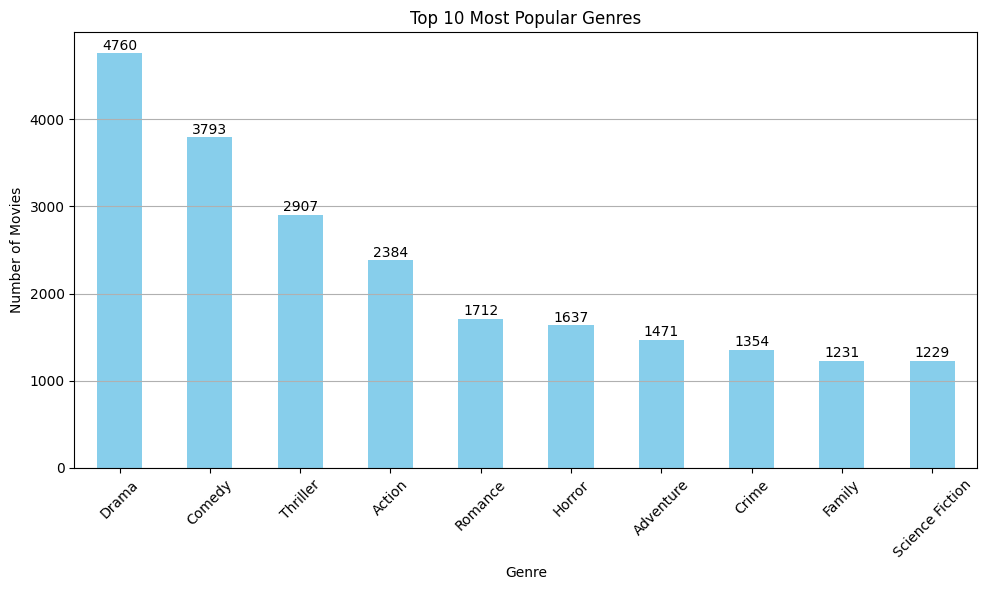

In [345]:
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
for i, val in enumerate(genre_counts.head(10).values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Conclusion (Q1): Most Popular Genres

The most popular genre is **Drama**, followed by **Comedy** and **Thriller**. This suggests that audience preferences lean toward emotionally engaging or entertaining films.


### Question 2
### What is the relationship between budget and movie popularity?


In [346]:
#Popularity and budget_adj have outliers which should be removed so will use without_outliers function
#budget_adj has missind data which should be dropped

df_q2 = df.dropna(subset=['budget_adj','popularity']).copy()
df_q2 = remove_outliers(df_q2, 'budget_adj')
df_q2 = remove_outliers(df_q2, 'popularity')

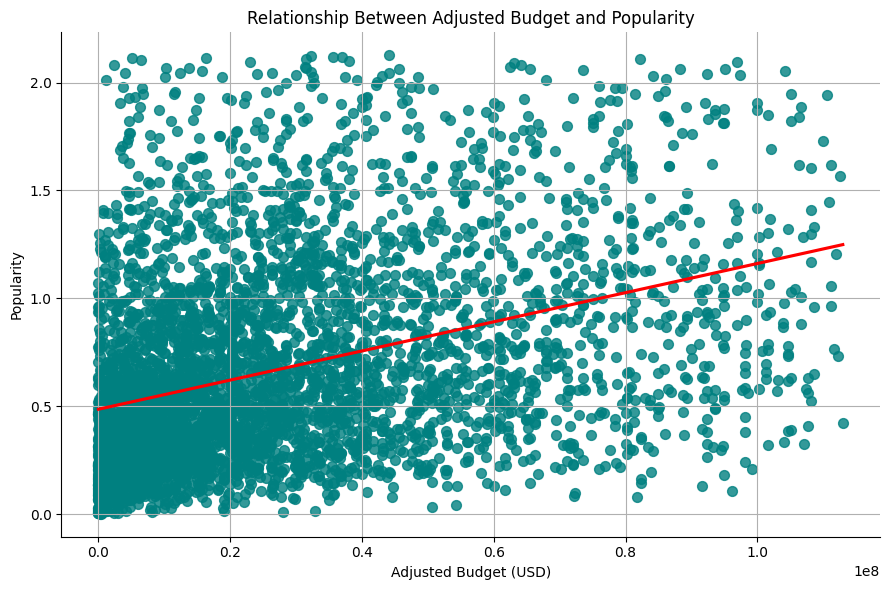

In [398]:

sns.lmplot(x='budget_adj', y='popularity', data=df_q2, height=6, aspect=1.5,ci=None, scatter_kws={'s': 50, 'color': 'teal'}, line_kws={'color': 'red'})
plt.title('Relationship Between Adjusted Budget and Popularity')
plt.xlabel('Adjusted Budget (USD)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


In [348]:
correlation=df_q2['popularity'].corr(df_q2['budget_adj'])
correlation

0.3781274221265056

###  Conclusion (Q2): Budget vs. Popularity

There is a **moderate positive correlation** (correlation coefficient ≈ 0.38) between a movie’s **budget** and its **popularity**. This suggests that higher-budget films tend to be more popular, possibly due to better production quality, star power, or wider marketing reach.


### Question 3
### Who are the most successful directors based on average movie ratings?

In [349]:
#Drop rows with missing values and vote_average outliers
#split director and put into a list
df_q3=df.dropna(subset=['director','vote_average']).copy()
df_q3=remove_outliers(df_q3, 'vote_average')
df_q3['director'] = df_q3['director'].str.split('|')
#explode genres to split list-like values in a column into separate row
df_q3= df_q3.explode('director')

In [350]:
#Calculate the mean of average votes of each director
director_avg_rating=df_q3.groupby('director')['vote_average'].mean()
director_avg_rating=director_avg_rating.sort_values(ascending=False)
director_avg_rating.head()

director
Dean Wellins       8.3
Andy Saunders      8.3
Jeff Feuerzeig     8.3
Claude Lanzmann    8.3
Damien Chazelle    8.2
Name: vote_average, dtype: float64

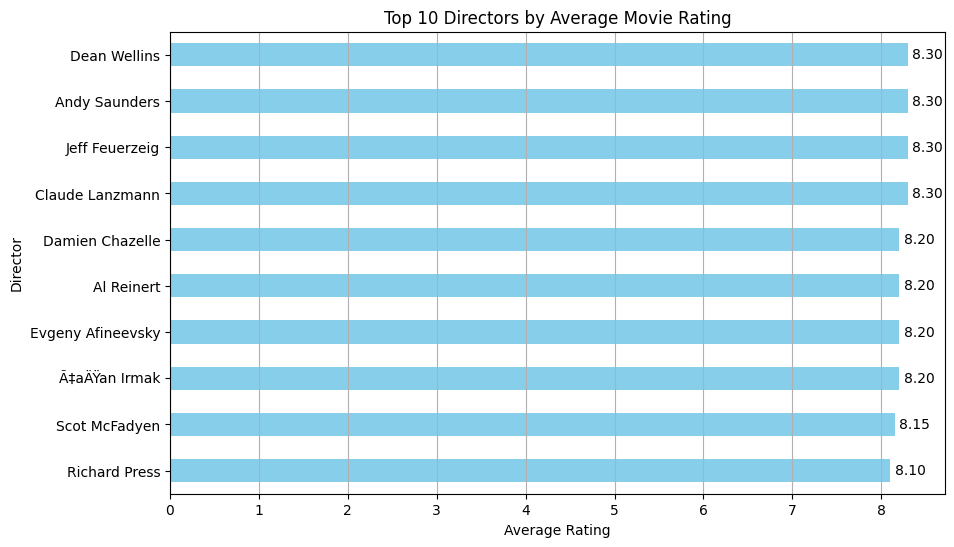

In [351]:
top_directors = director_avg_rating.head(10)

plt.figure(figsize=(10,6))
top_directors.plot(kind='barh', color='skyblue')
plt.title('Top 10 Directors by Average Movie Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Highest-rated on top
plt.grid(axis='x')
for i, val in enumerate(top_directors.head(10).values):
    plt.text(val + 0.05,i, f"{val:.2f}", va='center')
plt.show()


###  Conclusion (Q3): Top Directors by Average Ratings

Based on average movie ratings, **Dean Wellins**, **Andy Saunders**, **Jeff Feuerzeig**, **Claude Lanzmann**, and **Damien Chazelle** are among the most successful directors. Their consistently high ratings suggest a strong audience and critical appreciation for the quality of their work.


### Question 4
### Does a movie’s length affect how well it is rated?

In [352]:
#Drop missing runtime data and removing outliers
df_q4 = df.dropna(subset=['runtime', 'vote_average']).copy()
df_q4=remove_outliers(df_q4, 'runtime')
df_q4=remove_outliers(df_q4, 'vote_average')



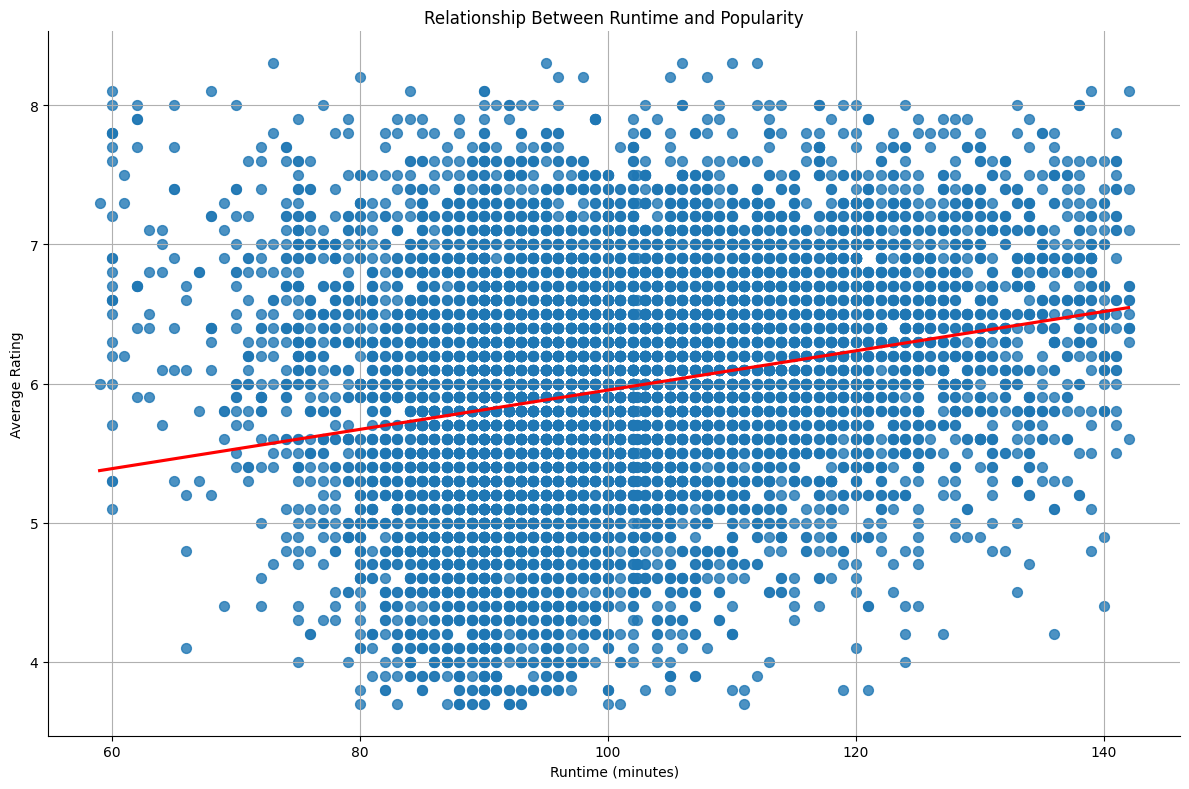

In [402]:
sns.lmplot(x='runtime', y='vote_average', data=df_q4, height=8, aspect=1.5, ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Relationship Between Runtime and Popularity')

plt.grid(True)
plt.tight_layout()
plt.show()


In [354]:
correlation=df_q4['vote_average'].corr(df_q4['runtime'])
correlation

0.24428255307597027

###  Conclusion (Q4): Does a Movie’s Length Affect Its Rating?

There is a **weak positive correlation (r ≈ 0.24)** between a movie's runtime and its average rating. This suggests that longer movies may be slightly better rated, but the effect is not strong enough to indicate a significant relationship.


### Question 5
### Which production companies produce the most financially successful movies, based on average Return on Investment (ROI)?

In [432]:
#Drop rows with missing data
#Calculate ROI as percentage
#remove outliers

df_q5 = df.dropna(subset=['production_companies', 'budget_adj', 'revenue_adj']).copy()
df_q5 = remove_outliers(df_q5, 'budget_adj')
df_q5 = remove_outliers(df_q5, 'revenue_adj')
df_q5['ROI'] = ((df_q5['revenue_adj'] - df_q5['budget_adj']) / df_q5['budget_adj']) * 100
df_q5 = remove_outliers(df_q5, 'ROI')

#Split multiple companies and explode
df_q5['production_companies'] = df_q5['production_companies'].str.split('|')
df_q5 = df_q5.explode('production_companies')
company_roi = df_q5.groupby('production_companies')['ROI'].mean()
top_10_roi = company_roi.sort_values(ascending=False).head(10)
top_10_roi


production_companies
Fantasy Films                       661.785500
Magical Elves Productions           657.245800
Scooter Braun Films                 657.245800
Newmarket Films                     654.732300
Talisman Productions                651.357271
Top Rope                            645.066583
Assassin Films                      642.105263
Sony Pictures International         639.875400
Vulcan Productions Inc.             639.179895
Les Productions Jacques Roitfeld    636.400000
Name: ROI, dtype: float64

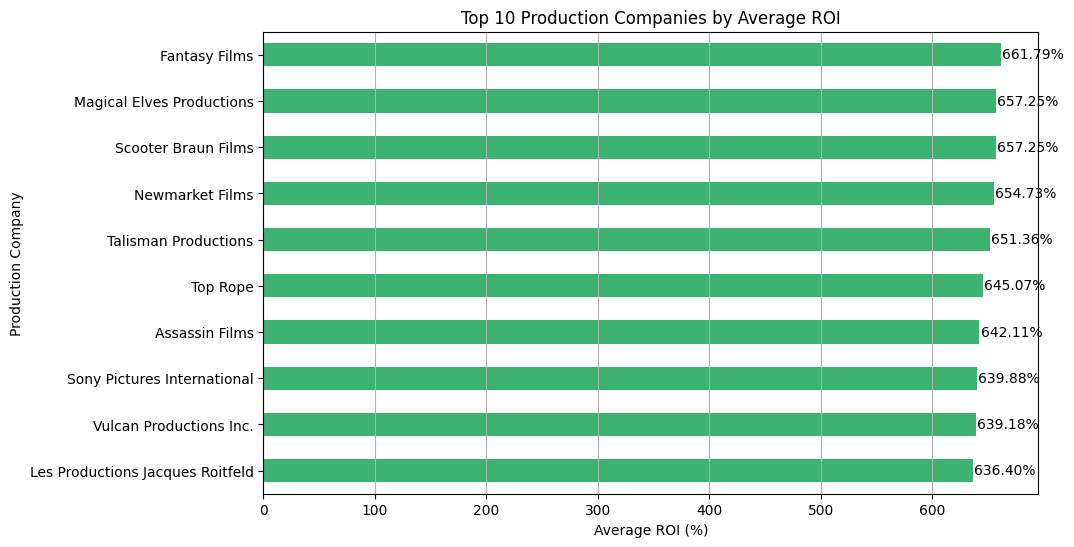

In [433]:
plt.figure(figsize=(10,6))
top_10_roi.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Average ROI (%)')
plt.ylabel('Production Company')
plt.title('Top 10 Production Companies by Average ROI')
plt.gca().invert_yaxis()
for i, val in enumerate(top_10_roi.values):
    plt.text(val + 1, i, f"{val:.2f}%", va='center')

plt.grid(axis='x')
plt.show()

###  Conclusion (Q5): Which Production Companies Are Most Financially Successful Based on ROI?

Based on average Return on Investment (ROI), **Fantasy Films**, **Magical Elves Productions**, and **Scooter Braun Films** lead as the most financially successful companies. These production houses achieve high returns relative to their budgets, indicating efficient and profitable production strategies.



### Question 6 
### What is the relation between budget and revenue?


In [386]:
#Drop miising data and remove outliers
df_q6 = df.dropna(subset=['budget_adj', 'revenue_adj']).copy()
df_q6 = remove_outliers(df_q6, 'budget_adj')
df_q6 = remove_outliers(df_q6, 'revenue_adj')


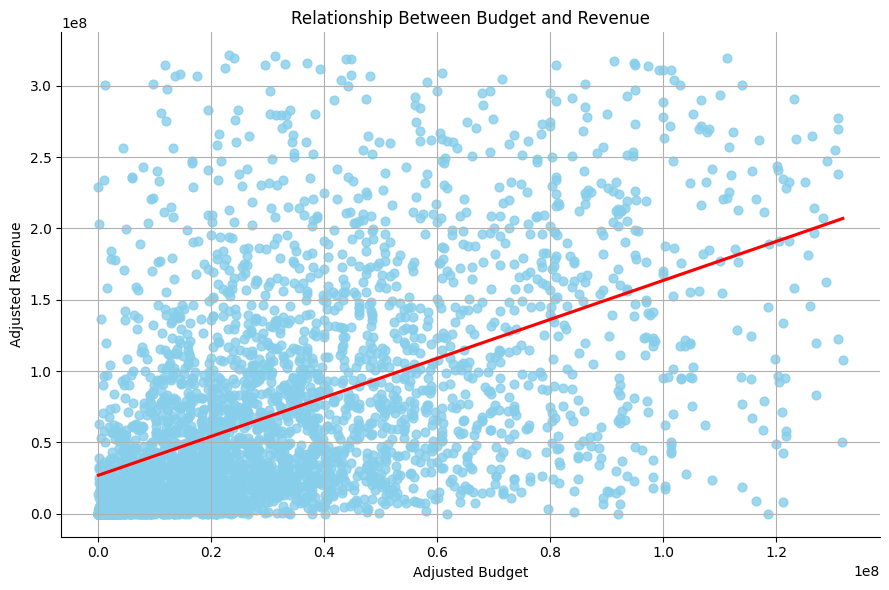

In [395]:
sns.lmplot(data=df_q6, x='budget_adj', y='revenue_adj',height=6 , aspect=1.5,scatter_kws={'s': 40, 'color': 'skyblue'},   line_kws={'color': 'red'}, ci=None)

plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue')
plt.title('Relationship Between Budget and Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [404]:
correlation=df_q6['budget_adj'].corr(df_q6['revenue_adj'])
correlation

0.5209886240661504

###  Conclusion (Q6): What is the Relation Between Budget and Revenue?

There is a **moderate positive correlation (r ≈ 0.52)** between a movie’s budget and its revenue, indicating that movies with higher budgets tend to generate higher revenues, though the relationship is not perfectly strong.


### Question 7 
### Which production companies have films with highest revenue?

In [435]:
#Drop rows with missing data , remove outliers and explode

df_q7 = df.dropna(subset=['production_companies','revenue_adj']).copy()
df_q7['production_companies'] = df_q7['production_companies'].str.split('|')
df_q7 = df_q7.explode('production_companies')

highest_revenue=df_q7.groupby('production_companies')['revenue_adj'].mean().sort_values(ascending=False)
highest_revenue.head(10)


production_companies
Hoya Productions                                   2.167325e+09
Truenorth Productions                              1.902723e+09
Alfran Productions                                 1.277914e+09
Argyle Enterprises                                 1.129535e+09
Julia Phillips and Michael Phillips Productions    1.092965e+09
Second Mate Productions                            1.081672e+09
MIRACLE Productions GmbH & Co. KG                  1.062776e+09
Disney Enterprises                                 1.024887e+09
Patalex IV Productions Limited                     1.000353e+09
Lightstorm Entertainment                           9.899351e+08
Name: revenue_adj, dtype: float64

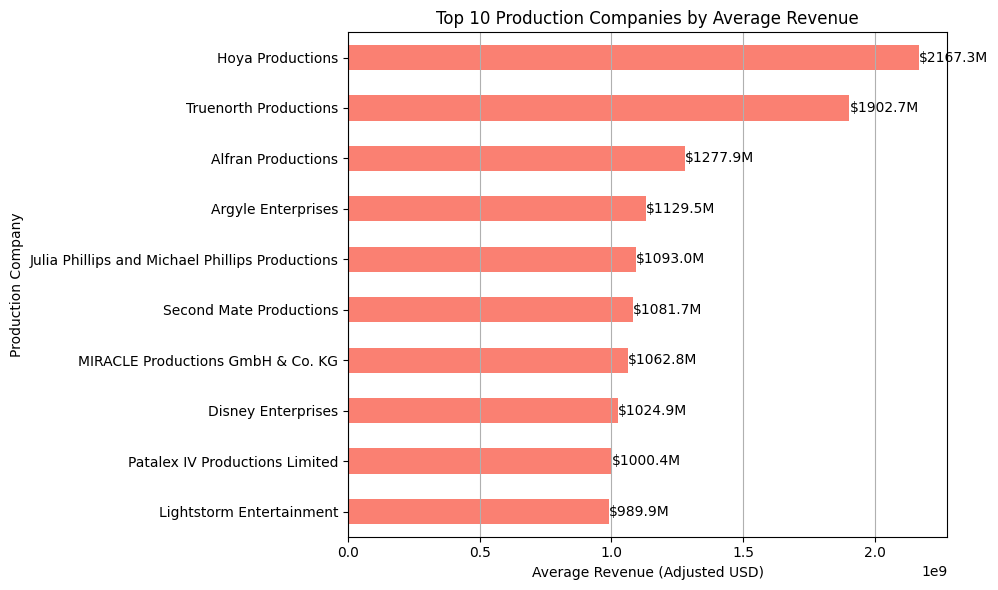

In [413]:
top_10_revenue = highest_revenue.head(10)

plt.figure(figsize=(10,6))
top_10_revenue.plot(kind='barh', color='salmon')
plt.xlabel('Average Revenue (Adjusted USD)')
plt.ylabel('Production Company')
plt.title('Top 10 Production Companies by Average Revenue')
plt.gca().invert_yaxis()  

for i, val in enumerate(top_10_revenue.values):
    plt.text(val + 1e6, i, f"${val/1e6:.1f}M", va='center')

plt.tight_layout()
plt.grid(axis='x')
plt.show()


###  Conclusion (Q7): Which Production Companies Have Films with the Highest Revenue?

Hoya Productions, Truenorth Productions, and Alfran Productions lead with films generating over $1 billion in revenue, demonstrating their ability to produce highly successful, top-grossing movies.


## Conclusions

This analysis helped uncover several meaningful patterns in the TMDb movie dataset. Drama, Comedy, and Action were the most common genres, showing what audiences often gravitate toward. While larger budgets can increase popularity and revenue, they don’t always guarantee high ratings.

Interestingly, some smaller production companies achieved high returns on investment, suggesting that strategic budgeting can be just as impactful as high spending. Longer movies also tended to receive slightly better ratings, though the correlation was weak.

The dataset provided useful insights overall, but it had a few limitations especially missing or unrealistic values in budget and revenue fields. Future analysis could benefit from more detailed data, such as cast influence, release timing, or marketing effort, to gain deeper insights into movie performance.
